In [10]:
# Run this cell to install pyarrow
!pip install pyarrow

python(65854) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [11]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

NBA_parquet_file = '10%rand_samp_player_prop_final_dataset.parquet'

# Read the Parquet file
NBA_df = pd.read_parquet(NBA_parquet_file)

NBA_df.head(2)

,id,away_team,home_team,GAME_DATE,Player_ID,player_name,Game_ID,prop_market,prop_type,prop,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,Bet_outcome
0,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,4,9,0,0,0,3,4,12,-3,0
1,5a4b28938902c4fba16da19c6e8c1296,Milwaukee Bucks,New York Knicks,2023-12-25,1626171,Bobby Portis,22300401.0,player_assists,Under,0.5,...,4,9,0,0,0,3,4,12,-3,0


In [12]:
!pip install pgmpy

python(65871) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [13]:
##Only WL as conditional element
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Define the structure of Bayesian Network
model = BayesianModel([('WL', 'Bet_outcome')])

# Assuming NBA_df contains the 'WL' and 'Bet_outcome' columns
# Calculate parameters using Maximum Likelihood Estimation
model.fit(NBA_df[['WL', 'Bet_outcome']], estimator=MaximumLikelihoodEstimator)

# Perform inference
infer = VariableElimination(model)

# Query the network to get P(Bet_outcome|WL=1) and P(Bet_outcome|WL=0)
prob_Bet_outcome_given_WL1 = infer.query(variables=['Bet_outcome'], evidence={'WL': 1})
prob_Bet_outcome_given_WL0 = infer.query(variables=['Bet_outcome'], evidence={'WL': 0})

print("P(Bet_outcome | WL=1):", prob_Bet_outcome_given_WL1)
print("P(Bet_outcome | WL=0):", prob_Bet_outcome_given_WL0)


P(Bet_outcome | WL=1): +----------------+--------------------+
| Bet_outcome    |   phi(Bet_outcome) |
+================+====================+
| Bet_outcome(0) |             0.4734 |
+----------------+--------------------+
| Bet_outcome(1) |             0.5266 |
+----------------+--------------------+
P(Bet_outcome | WL=0): +----------------+--------------------+
| Bet_outcome    |   phi(Bet_outcome) |
+================+====================+
| Bet_outcome(0) |             0.4705 |
+----------------+--------------------+
| Bet_outcome(1) |             0.5295 |
+----------------+--------------------+


In [15]:
!pip install matplotlib

python(65881) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


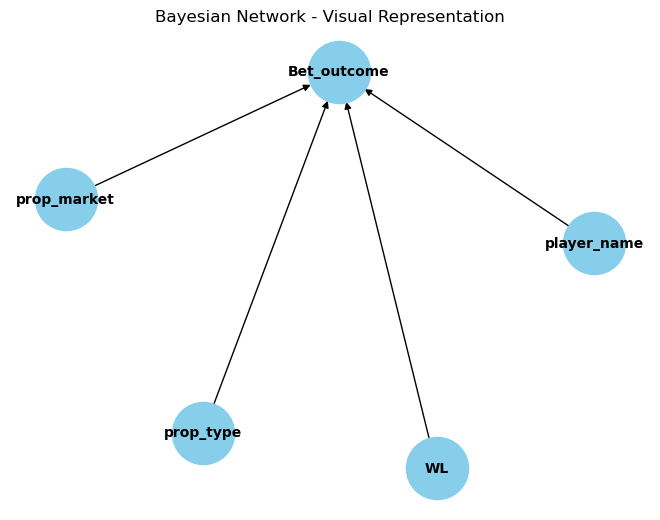

Probability of Bet_outcome given WL=1, player_assists, Over, LeBron James:
+----------------+--------------------+
| Bet_outcome    |   phi(Bet_outcome) |
+================+====================+
| Bet_outcome(0) |             0.9231 |
+----------------+--------------------+
| Bet_outcome(1) |             0.0769 |
+----------------+--------------------+

Probability of Bet_outcome given WL=0, player_points, Under, LeBron James:
+----------------+--------------------+
| Bet_outcome    |   phi(Bet_outcome) |
+================+====================+
| Bet_outcome(0) |             0.9740 |
+----------------+--------------------+
| Bet_outcome(1) |             0.0260 |
+----------------+--------------------+


In [23]:
import pandas as pd
from pgmpy.models import BayesianNetwork  # Updated to the correct class name
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('WL', 'Bet_outcome'),
    ('prop_market', 'Bet_outcome'),
    ('prop_type', 'Bet_outcome'),
    ('player_name', 'Bet_outcome')
])

# Step 2: Fit the model using Maximum Likelihood Estimation
# NBA_df needs to be defined with appropriate data before this step.
model.fit(NBA_df, estimator=MaximumLikelihoodEstimator)

# Step 3: Perform inference on the model
infer = VariableElimination(model)

# Visualization - Manually creating a NetworkX graph
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="k", font_weight='bold')
plt.title("Bayesian Network - Visual Representation")
plt.show()

# Example queries and results printing
# Query 1: Get P(Bet_outcome | WL=1, prop_market='Type1', prop_type='Over', player_name='John Doe')
prob_Bet_outcome_given_conditions1 = infer.query(
    variables=['Bet_outcome'], 
    evidence={'WL': 1, 'prop_market': 'player_assists', 'prop_type': 'Over', 'player_name': 'LeBron James'}
)

# Query 2: Get P(Bet_outcome | WL=0, prop_market='Type2', prop_type='Under', player_name='Jane Doe')
prob_Bet_outcome_given_conditions2 = infer.query(
    variables=['Bet_outcome'], 
    evidence={'WL': 0, 'prop_market': 'player_points', 'prop_type': 'Under', 'player_name': 'LeBron James'}
)

print("Probability of Bet_outcome given WL=1, player_assists, Over, LeBron James:")
print(prob_Bet_outcome_given_conditions1)

print("\nProbability of Bet_outcome given WL=0, player_points, Under, LeBron James:")
print(prob_Bet_outcome_given_conditions2)


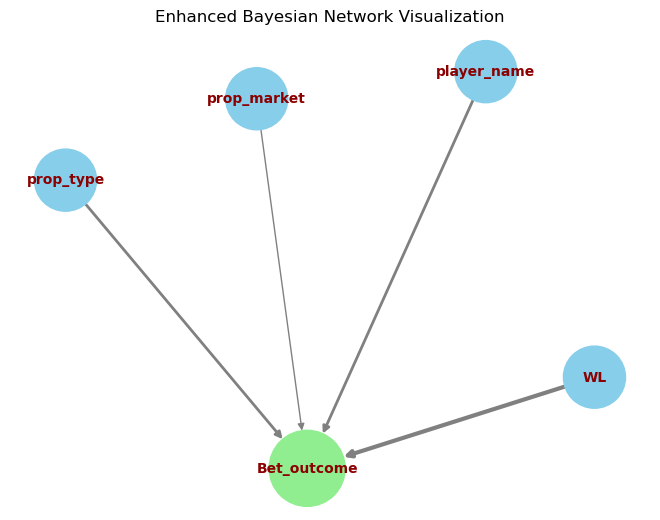

In [16]:
# import pandas as pd
# from pgmpy.models import BayesianNetwork  # Updated to the correct class name
# from pgmpy.estimators import MaximumLikelihoodEstimator
# from pgmpy.inference import VariableElimination
# import networkx as nx
# import matplotlib.pyplot as plt

# # Example Bayesian Network
# model = BayesianNetwork([
#     ('WL', 'Bet_outcome'),
#     ('prop_market', 'Bet_outcome'),
#     ('prop_type', 'Bet_outcome'),
#     ('player_name', 'Bet_outcome')
# ])

# # Hypothetical importance scores for visualization
# importance_scores = {
#     ('WL', 'Bet_outcome'): 3,
#     ('prop_market', 'Bet_outcome'): 1,
#     ('prop_type', 'Bet_outcome'): 2,
#     ('player_name', 'Bet_outcome'): 2
# }

# # Create graph
# nx_graph = nx.DiGraph()
# nx_graph.add_edges_from(model.edges())

# # Define node colors and sizes
# node_colors = ['skyblue' if node != 'Bet_outcome' else 'lightgreen' for node in nx_graph]
# node_sizes = [3000 if node == 'Bet_outcome' else 2000 for node in nx_graph]

# # Define edge widths
# edge_widths = [importance_scores[edge] for edge in nx_graph.edges()]

# # Drawing the graph
# pos = nx.spring_layout(nx_graph)  # for better layout
# nx.draw(nx_graph, pos, with_labels=True, node_size=node_sizes, node_color=node_colors,
#         font_size=10, font_color='darkred', font_weight='bold', width=edge_widths,
#         edge_color='gray')
# plt.title("Enhanced Bayesian Network Visualization")
# plt.show()


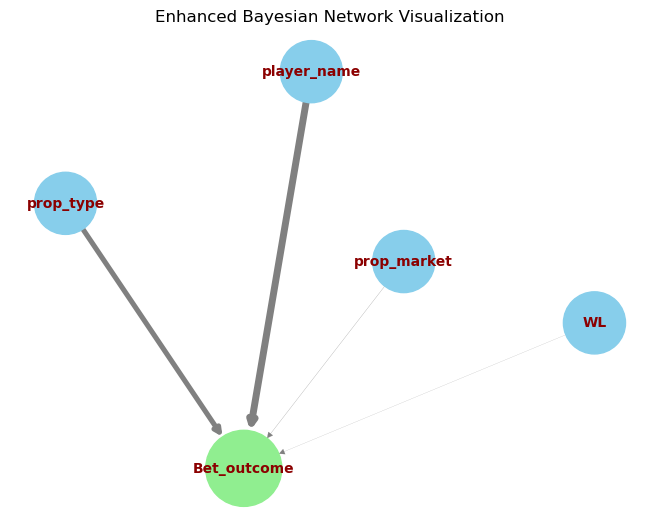

In [20]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score

# Example Bayesian Network initialization
model = BayesianNetwork([
    ('WL', 'Bet_outcome'),
    ('prop_market', 'Bet_outcome'),
    ('prop_type', 'Bet_outcome'),
    ('player_name', 'Bet_outcome')
])

# Fit model using Maximum Likelihood Estimator with your DataFrame NBA_df
model.fit(NBA_df, estimator=MaximumLikelihoodEstimator)

# Calculate mutual information for each edge
importance_scores = {}
for start, end in model.edges():
    # Calculate mutual information between the variables
    mi = mutual_info_score(NBA_df[start], NBA_df[end])
    importance_scores[(start, end)] = mi

# Normalize importance scores to enhance visualization
max_importance = max(importance_scores.values())
importance_scores_normalized = {k: v / max_importance * 5 for k, v in importance_scores.items()}  # Scale by 5 for better visualization

# Define a minimum edge width so that all edges are visible, even if they have small importance scores
min_width = 0.1  # You can adjust this value as needed for visibility

# Define edge widths based on importance scores with a minimum width
edge_widths = [max(importance_scores_normalized[edge], min_width) for edge in model.edges()]

# Create graph
nx_graph = nx.DiGraph()
nx_graph.add_edges_from(model.edges())

# Define node colors and sizes
node_colors = ['skyblue' if node != 'Bet_outcome' else 'lightgreen' for node in nx_graph]
node_sizes = [3000 if node == 'Bet_outcome' else 2000 for node in nx_graph]

# Drawing the graph
pos = nx.spring_layout(nx_graph)  # for better layout
nx.draw(nx_graph, pos, with_labels=True, node_size=node_sizes, node_color=node_colors,
        font_size=10, font_color='darkred', font_weight='bold', width=edge_widths,
        edge_color='gray')
plt.title("Enhanced Bayesian Network Visualization")
plt.show()


In [22]:
# Convert dictionary to DataFrame
importance_df = pd.DataFrame(list(importance_scores.items()), columns=['Edge', 'Importance_Score'])

# Split the Edge tuple into two columns: 'From' and 'To'
importance_df[['From', 'To']] = pd.DataFrame(importance_df['Edge'].tolist(), index=importance_df.index)

# Drop the 'Edge' column as it's no longer needed
importance_df.drop('Edge', axis=1, inplace=True)

# Rearrange columns to have 'From' and 'To' before 'Importance_Score'
importance_df = importance_df[['From', 'To', 'Importance_Score']]

importance_df

,From,To,Importance_Score
0,WL,Bet_outcome,0.000004
1,prop_market,Bet_outcome,0.000101
2,prop_type,Bet_outcome,0.002209
3,player_name,Bet_outcome,0.003011
